# Import required packages

In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score,roc_curve,auc

# Load Dataset

In [ ]:
emp_data = pd.read_csv("/content/sample_data/dataset_for_attrition_.csv")

# Data Exploration

In [ ]:
#View last five rows of the dataset
emp_data.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [ ]:
#View last five rows of the dataset
emp_data.tail()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49652,8321,12/1/2014 0:00,11/28/1994,11/24/2013,12/30/2014,20,1,Grand Forks,Customer Service,Cashier,13,F,Female,Layoff,Involuntary,2014,TERMINATED,STORES


In [ ]:
#Checking the data types in the dataset
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

In [ ]:
#View summary statistics for the dataframe
emp_data.describe()

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,49653.000000,49653.000000,49653.000000,49653.000000,49653.000000
mean,4859.495740,42.077035,10.434596,27.297605,2010.612612
std,1826.571142,12.427257,6.325286,13.514134,2.845577
min,1318.000000,19.000000,0.000000,1.000000,2006.000000
25%,3360.000000,31.000000,5.000000,16.000000,2008.000000
50%,5031.000000,42.000000,10.000000,28.000000,2011.000000
75%,6335.000000,53.000000,15.000000,42.000000,2013.000000
max,8336.000000,65.000000,26.000000,46.000000,2015.000000


In [ ]:
#Find the pairwise correlation of all columns
emp_data.corr()

<ipython-input-92-eac5bf147ef8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  emp_data.corr()


,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
EmployeeID,1.000000,-0.926278,-0.898833,-0.010321,0.198741
age,-0.926278,1.000000,0.909430,-0.004068,-0.039738
length_of_service,-0.898833,0.909430,1.000000,0.011724,0.237022
store_name,-0.010321,-0.004068,0.011724,1.000000,0.008656
STATUS_YEAR,0.198741,-0.039738,0.237022,0.008656,1.000000


In [ ]:
#Shape of the dataset
emp_data.shape

(49653, 18)

# Data Cleaning & Pre-Processing

In [ ]:
#check for null values
emp_data.isnull()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
49649,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
49650,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
49651,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
emp_data.isnull().sum()

EmployeeID             0
recorddate_key         0
birthdate_key          0
orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_name             0
gender_short           0
gender_full            0
termreason_desc        0
termtype_desc          0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
dtype: int64

In [ ]:
# Check duplicates
emp_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49648    False
49649    False
49650    False
49651    False
49652    False
Length: 49653, dtype: bool

In [ ]:
# Remove duplicate rows
emp_data.drop_duplicates(inplace=True)

In [ ]:
# Drop redundant data attribute
emp_data.drop(["gender_full"],axis = 1,inplace=True)

In [ ]:
# Get unique values of city_name
emp_data.city_name.unique()

array(['Vancouver', 'Terrace', 'Nanaimo', 'Nelson', 'Kelowna', 'Victoria',
       'Kamloops', 'Fort St John', 'Surrey', 'Vernon', 'Quesnel',
       'Chilliwack', 'Dawson Creek', 'Squamish', 'New Westminster',
       'Port Coquitlam', 'Cortes Island', 'Burnaby', 'Bella Bella',
       'Cranbrook', 'Williams Lake', 'Trail', 'Prince George', 'Richmond',
       'Grand Forks', 'West Vancouver', 'Abbotsford', 'Aldergrove',
       'Langley', 'North Vancouver', 'White Rock', 'New Westminister',
       'Fort Nelson', 'Haney', 'Valemount', 'Ocean Falls', 'Princeton',
       'Dease Lake', 'Pitt Meadows', 'Blue River'], dtype=object)

In [ ]:
# Get unique values of department_name
emp_data.department_name.unique()

array(['Executive', 'Store Management', 'Meats', 'Recruitment',
       'Training', 'Labor Relations', 'HR Technology', 'Employee Records',
       'Compensation', 'Legal', 'Produce', 'Accounts Receiveable',
       'Bakery', 'Information Technology', 'Accounts Payable', 'Audit',
       'Accounting', 'Investment', 'Dairy', 'Processed Foods',
       'Customer Service'], dtype=object)

In [ ]:
# Get unique values of BUSINESS_UNIT
emp_data.BUSINESS_UNIT.unique()

array(['HEADOFFICE', 'STORES'], dtype=object)

In [ ]:
# Get unique values of job_title
emp_data.job_title.unique()

array(['CEO', 'VP Stores', 'Legal Counsel', 'VP Human Resources',
       'VP Finance', 'Exec Assistant, VP Stores',
       'Exec Assistant, Legal Counsel', 'CHief Information Officer',
       'Store Manager', 'Meats Manager',
       'Exec Assistant, Human Resources', 'Exec Assistant, Finance',
       'Director, Recruitment', 'Director, Training',
       'Director, Labor Relations', 'Director, HR Technology',
       'Director, Employee Records', 'Director, Compensation',
       'Corporate Lawyer', 'Produce Manager',
       'Director, Accounts Receivable', 'Bakery Manager',
       'Systems Analyst', 'Director, Accounts Payable', 'Director, Audit',
       'Director, Accounting', 'Director, Investments', 'Dairy Person',
       'Recruiter', 'Processed Foods Manager', 'Customer Service Manager',
       'Trainer', 'Meat Cutter', 'Labor Relations Analyst',
       'Dairy Manager', 'HRIS Analyst', 'Benefits Admin',
       'Compensation Analyst', 'Accounts Receiveable Clerk',
       'Accounts Pay

In [ ]:
Board_of_Director = ['CEO','VP Stores', 'Director, Recruitment', 'VP Human Resources', 'VP Finance', 'Director, Accounts Receivable',
         'Director, Accounting', 'Director, Employee Records', 'Director, Accounts Payable', 'Director, HR Technology',
         'Director, Investments', 'Director, Labor Relations', 'Director, Audit', 'Director, Training',
         'Director, Compensation']
Executive = [ 'Exec Assistant, VP Stores', 'Exec Assistant, Legal Counsel', 'CHief Information Officer',
             'Exec Assistant, Human Resources', 'Exec Assistant, Finance']
Manager = ['Customer Service Manager', 'Processed Foods Manager', 'Meats Manager',
           'Bakery Manager', 'Produce Manager', 'Store Manager', 'Trainer', 'Dairy Manager']
Employee = ['Meat Cutter', 'Dairy Person', 'Produce Clerk', 'Baker', 'Cashier',
            'Shelf Stocker', 'Recruiter', 'HRIS Analyst', 'Accounting Clerk',
            'Benefits Admin', 'Labor Relations Analyst', 'Accounts Receiveable Clerk',
            'Accounts Payable Clerk', 'Auditor', 'Compensation Analyst',
            'Investment Analyst', 'Systems Analyst', 'Corporate Lawyer', 'Legal Counsel']



In [ ]:
# Re-categorize job_title in four main values
def job_title(job):
    if job in Board_of_Director: return 'Board_of_Director'
    if job in Executive: return 'Executive'
    if job in Manager: return 'Manager'
    if job in Employee: return 'Employee'

emp_data['job_title'] = emp_data['job_title'].map(job_title)

In [ ]:
city_population = {
    'Vancouver':2313328,
     'Victoria':289625,
     'Nanaimo':84905,
     'New Westminster':58549,
     'Kelowna':125109,
     'Burnaby':202799,
     'Kamloops':68714,
     'Prince George':65558,
     'Cranbrook':18610,
     'Surrey':394976,
     'Richmond':182000,
     'Terrace':19443,
     'Chilliwack':77000,
     'Trail':9707,
     'Langley':23606,
     'Vernon':47274,
     'Squamish':19512,
     'Quesnel':13799,
     'Abbotsford':151683,
     'North Vancouver':48000,
     'Fort St John':17402,
     'Williams Lake':14168,
     'West Vancouver':42694,
     'Port Coquitlam':114565,
     'Aldergrove':12363,
     'Fort Nelson':3561,
     'Nelson':9813,
     'New Westminister':58549,
     'Grand Forks':4049,
     'White Rock':66450,
     'Haney':82256,
     'Princeton':2828,
     'Dawson Creek':10802,
     'Bella Bella':1019,
     'Ocean Falls':129,
     'Pitt Meadows':174410,
     'Cortes Island':1042,
     'Valemount':1021,
     'Dease Lake':335,
     'Blue River':157
}

In [ ]:
# Change city name to population
def change_city_name(city):
    return city_population(city)
emp_data['city_name'] = emp_data['city_name'].map(city_population)

In [ ]:
sns.set_style('darkgrid')

In [ ]:
emp_data.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,2313328,Executive,Board_of_Director,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,2313328,Executive,Board_of_Director,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,2313328,Executive,Board_of_Director,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,2313328,Executive,Board_of_Director,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,2313328,Executive,Board_of_Director,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [ ]:
# Return counts of unique values in status
emp_data["STATUS"].value_counts()

ACTIVE        48168
TERMINATED     1485
Name: STATUS, dtype: int64

Text(0, 0.5, 'Count')

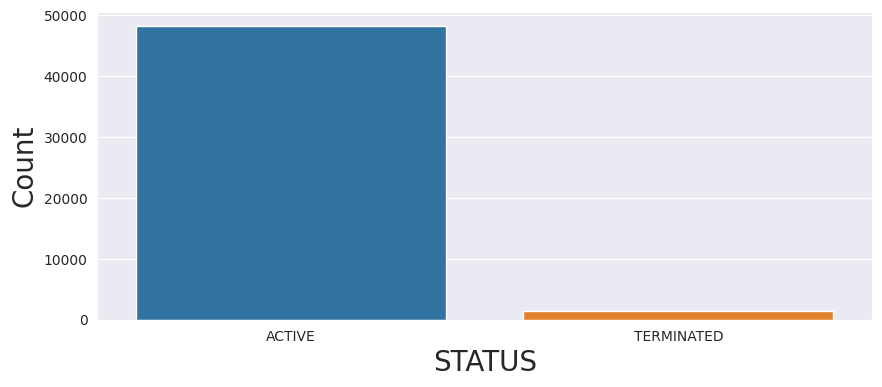

In [ ]:
# Check balance
plt.figure(figsize=(10, 4))
sns.countplot(data=emp_data,x="STATUS");
plt.xlabel('STATUS', fontsize=20);
plt.ylabel('Count', fontsize=20)

In [ ]:
# Resampling of dataset
from sklearn.utils import resample

# Separate Target Classes
emp_data_1 = emp_data[emp_data.STATUS=="ACTIVE"]
emp_data_2 = emp_data[emp_data.STATUS=="TERMINATED"]

# Upsample minority class
emp_data_2_balanced = resample(emp_data_2,
                                 replace=True,     # sample with replacement
                                 n_samples=48168,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with balanced minority class
emp_data_balanced = pd.concat([emp_data_1, emp_data_2_balanced])

# Display new class counts
emp_data_balanced.STATUS.value_counts()

ACTIVE        48168
TERMINATED    48168
Name: STATUS, dtype: int64

In [ ]:
emp_data_balanced

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,2313328,Executive,Board_of_Director,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,2313328,Executive,Board_of_Director,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,2313328,Executive,Board_of_Director,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,2313328,Executive,Board_of_Director,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,2313328,Executive,Board_of_Director,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48938,4480,1/1/2007 0:00,1/31/1947,8/8/1998,1/31/2007,60,8,84905,Produce,Employee,18,M,Retirement,Voluntary,2007,TERMINATED,STORES
48796,4057,11/1/2010 0:00,11/24/1945,6/1/1997,11/24/2010,65,13,13799,Meats,Employee,28,F,Retirement,Voluntary,2010,TERMINATED,STORES
49456,7207,11/1/2012 0:00,5/10/1986,5/19/2009,11/12/2012,26,3,58549,Processed Foods,Employee,21,F,Resignaton,Voluntary,2012,TERMINATED,STORES
49046,4752,12/1/2007 0:00,12/16/1947,6/23/1999,12/16/2007,60,8,2313328,Meats,Employee,35,M,Retirement,Voluntary,2007,TERMINATED,STORES


Text(0, 0.5, 'Count')

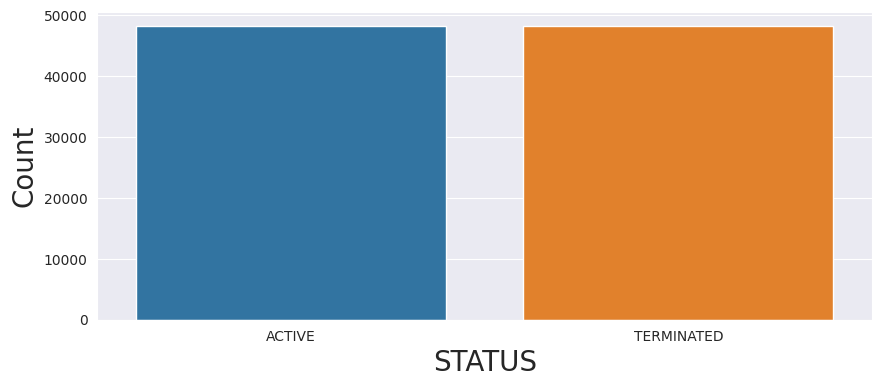

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=emp_data_balanced,x="STATUS");
plt.xlabel('STATUS', fontsize=20);
plt.ylabel('Count', fontsize=20)

# Data Visualization

<Axes: xlabel='city_name', ylabel='count'>

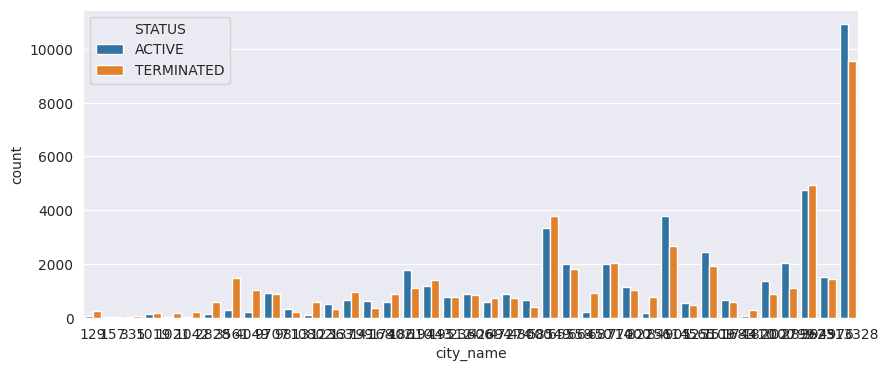

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(x="city_name", hue="STATUS", data=emp_data_balanced)

In [ ]:
def change_city(population):
    str = 'rural'
    if (population >= 10000) & (population < 100000): str = 'town'
    if population >= 100000: str = 'mega'
    return str

emp_data_balanced['city_name'] = emp_data_balanced.city_name.map(change_city)

<Axes: xlabel='city_name', ylabel='count'>

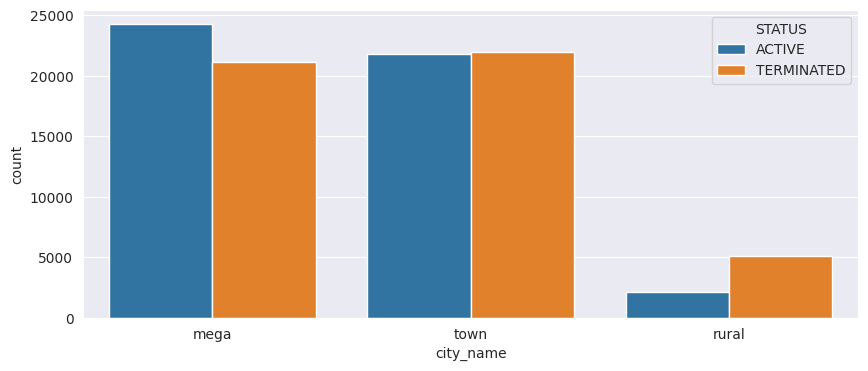

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(x="city_name", hue="STATUS", data=emp_data_balanced)

<Axes: xlabel='BUSINESS_UNIT', ylabel='count'>

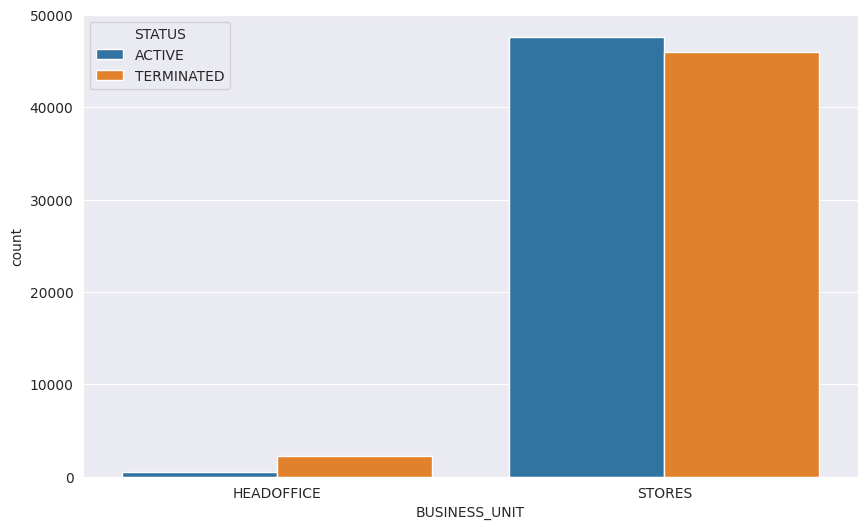

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=emp_data_balanced,x="BUSINESS_UNIT", hue="STATUS" )

In [ ]:
emp_data_balanced.BUSINESS_UNIT.nunique()

2

<Axes: xlabel='job_title', ylabel='count'>

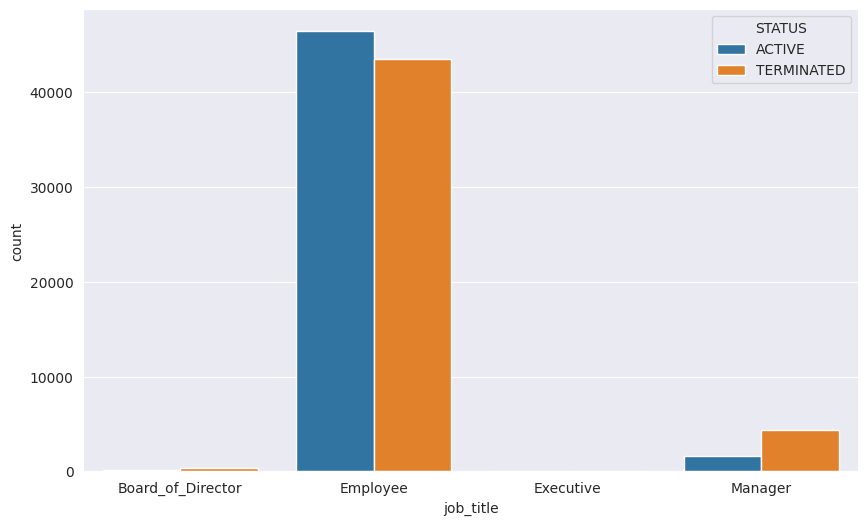

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=emp_data_balanced,x="job_title", hue="STATUS")

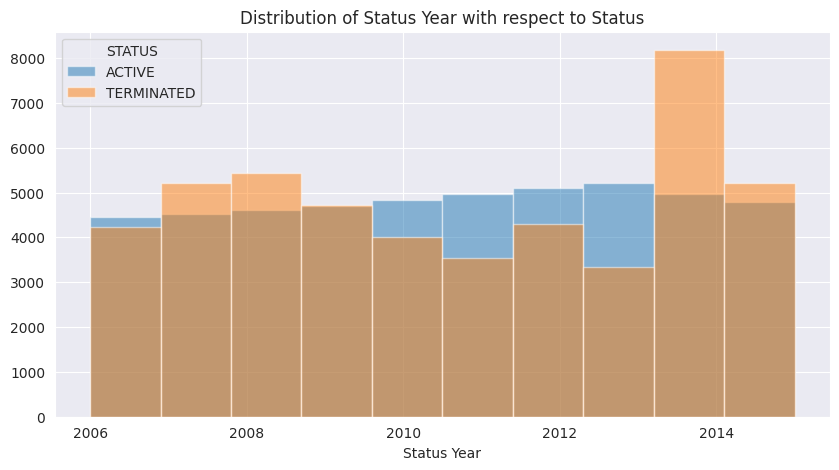

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist("STATUS_YEAR", data = emp_data_balanced[emp_data_balanced["STATUS"] == "ACTIVE"], alpha = 0.5, label = "ACTIVE")
plt.hist("STATUS_YEAR", data = emp_data_balanced[emp_data_balanced["STATUS"] == "TERMINATED"], alpha = 0.5, label = "TERMINATED")
plt.title("Distribution of Status Year with respect to Status")
plt.xlabel("Status Year")
plt.legend(title = "STATUS")

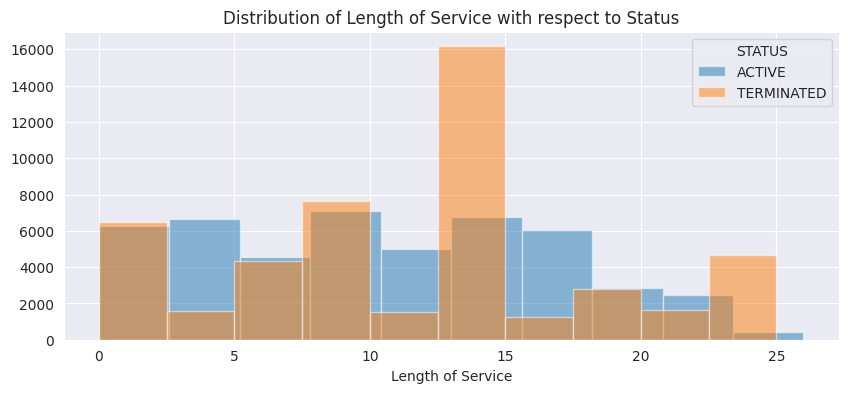

In [ ]:
plt.figure(figsize=(10, 4))
plt.hist("length_of_service", data = emp_data_balanced[emp_data_balanced["STATUS"] == "ACTIVE"], alpha = 0.5, label = "ACTIVE")
plt.hist("length_of_service", data = emp_data_balanced[emp_data_balanced["STATUS"] == "TERMINATED"], alpha = 0.5, label = "TERMINATED")
plt.title("Distribution of Length of Service with respect to Status")
plt.xlabel("Length of Service")
plt.legend(title = "STATUS")

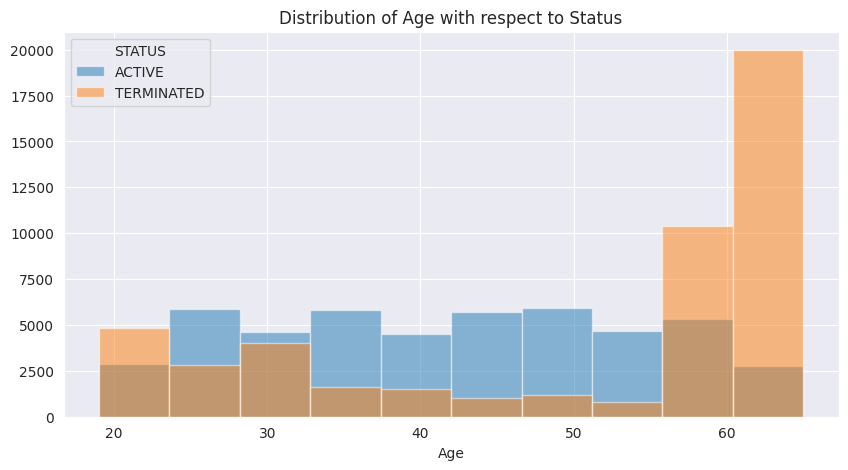

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist("age", data = emp_data_balanced[emp_data_balanced["STATUS"] == "ACTIVE"], alpha = 0.5, label = "ACTIVE")
plt.hist("age", data = emp_data_balanced[emp_data_balanced["STATUS"] == "TERMINATED"], alpha = 0.5, label = "TERMINATED")
plt.title("Distribution of Age with respect to Status")
plt.xlabel("Age")
plt.legend(title = "STATUS")

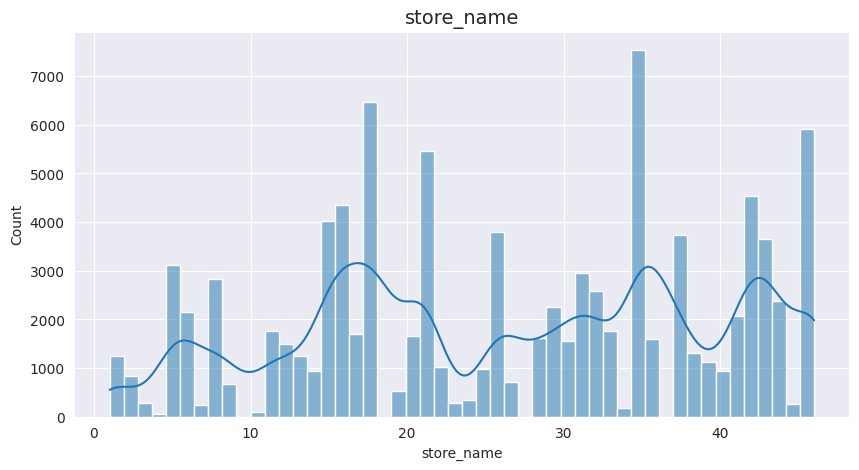

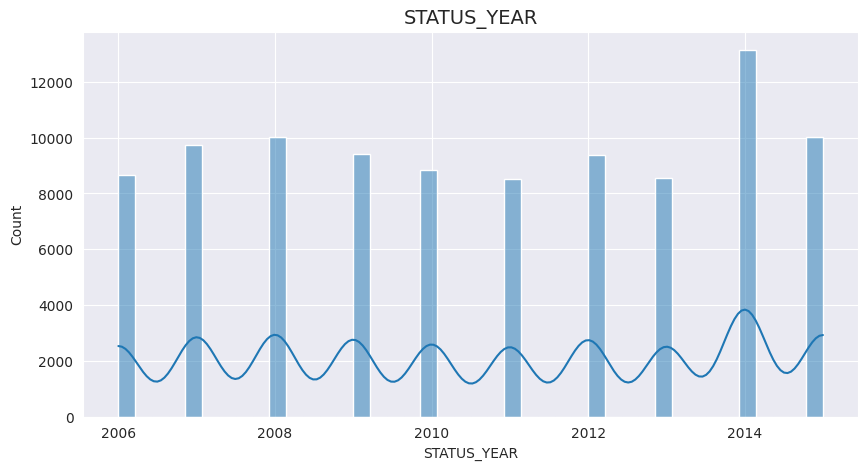

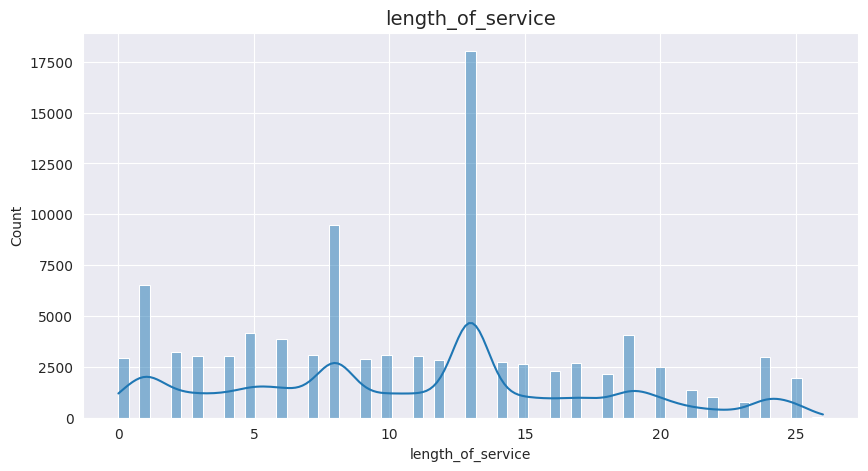

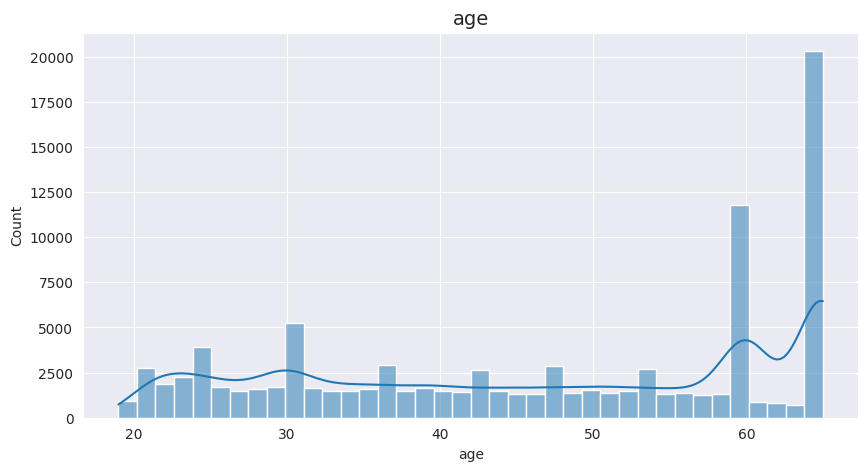

In [ ]:
for column in ['store_name', 'STATUS_YEAR', 'length_of_service', 'age']:
    plt.figure(figsize=(10, 5))
    sns.histplot(emp_data_balanced[column], label = 'terminated',  kde = True)
    plt.title(column, size = 14)

In [ ]:
emp_data_balanced.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,mega,Executive,Board_of_Director,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,mega,Executive,Board_of_Director,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,mega,Executive,Board_of_Director,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,mega,Executive,Board_of_Director,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,mega,Executive,Board_of_Director,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [ ]:
city_name_label = {value: key for key, value in enumerate(emp_data_balanced['city_name'].unique())}
emp_data_balanced['city_name'] = emp_data_balanced['city_name'].map(city_name_label)

In [ ]:
city_name_label

{'mega': 0, 'town': 1, 'rural': 2}

In [ ]:
department_name_label = {value: key for key, value in enumerate(emp_data_balanced['department_name'].unique())}
emp_data_balanced['department_name'] = emp_data_balanced['department_name'].map(department_name_label)

In [ ]:
department_name_label

{'Executive': 0,
 'Store Management': 1,
 'Meats': 2,
 'Recruitment': 3,
 'Training': 4,
 'Labor Relations': 5,
 'HR Technology': 6,
 'Employee Records': 7,
 'Compensation': 8,
 'Legal': 9,
 'Produce': 10,
 'Accounts Receiveable': 11,
 'Bakery': 12,
 'Information Technology': 13,
 'Accounts Payable': 14,
 'Audit': 15,
 'Accounting': 16,
 'Investment': 17,
 'Dairy': 18,
 'Processed Foods': 19,
 'Customer Service': 20}

In [ ]:
job_title_label = {value: key for key, value in enumerate(emp_data_balanced['job_title'].unique())}
emp_data_balanced['job_title'] = emp_data_balanced['job_title'].map(job_title_label)

In [ ]:
job_title_label

{'Board_of_Director': 0, 'Employee': 1, 'Executive': 2, 'Manager': 3}

In [ ]:
gender_short_label = {value: key for key, value in enumerate(emp_data_balanced['gender_short'].unique())}
emp_data_balanced['gender_short'] = emp_data_balanced['gender_short'].map(gender_short_label)

In [ ]:
gender_short_label

{'M': 0, 'F': 1}

In [ ]:
term_desc_label = {value: key for key, value in enumerate(emp_data_balanced['termreason_desc'].unique())}
emp_data_balanced['termreason_desc'] = emp_data_balanced['termreason_desc'].map(term_desc_label)

In [ ]:
term_desc_label

{'Not Applicable': 0, 'Resignaton': 1, 'Layoff': 2, 'Retirement': 3}

In [ ]:
termtype_desc_label = {value: key for key, value in enumerate(emp_data_balanced['termtype_desc'].unique())}
emp_data_balanced['termtype_desc'] = emp_data_balanced['termtype_desc'].map(termtype_desc_label)

In [ ]:
termtype_desc_label

{'Not Applicable': 0, 'Voluntary': 1, 'Involuntary': 2}

In [ ]:
status_label = {value: key for key, value in enumerate(emp_data_balanced['STATUS'].unique())}
emp_data_balanced['STATUS'] = emp_data_balanced['STATUS'].map(status_label)

In [ ]:
status_label

{'ACTIVE': 0, 'TERMINATED': 1}

In [ ]:
business_label = {value: key for key, value in enumerate(emp_data_balanced['BUSINESS_UNIT'].unique())}
emp_data_balanced['BUSINESS_UNIT'] = emp_data_balanced['BUSINESS_UNIT'].map(business_label)

In [ ]:
business_label

{'HEADOFFICE': 0, 'STORES': 1}

In [ ]:
emp_data_balanced.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,0,0,0,35,0,0,0,2006,0,0
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,0,0,0,35,0,0,0,2007,0,0
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,0,0,0,35,0,0,0,2008,0,0
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,0,0,0,35,0,0,0,2009,0,0
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,0,0,0,35,0,0,0,2010,0,0


# Generate correlation matrix

<ipython-input-142-caa21abc8221>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(emp_data_balanced.corr(), annot=True);


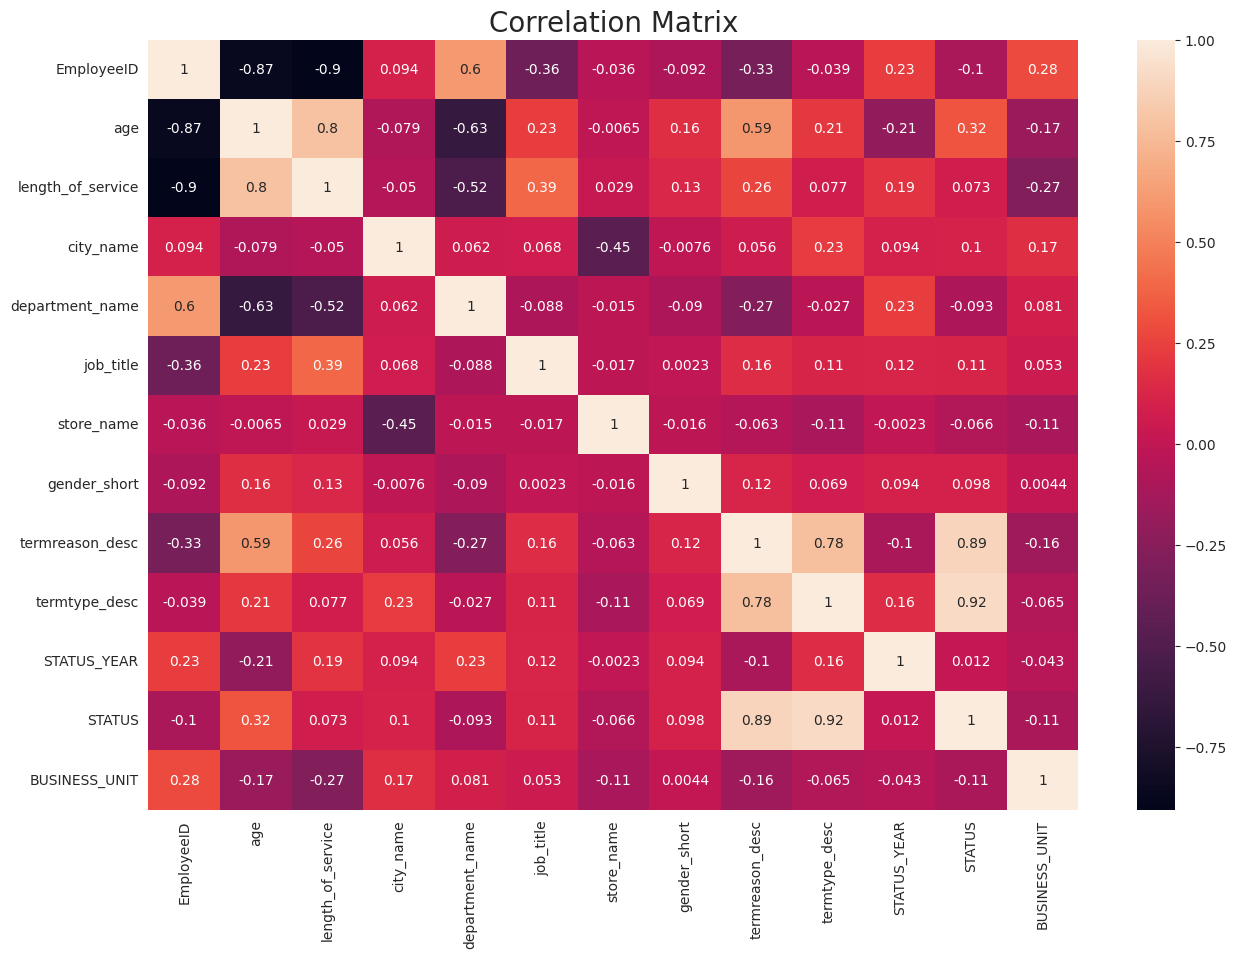

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(emp_data_balanced.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

In [ ]:
emp_data_balanced.corr()['STATUS'].sort_values(ascending=False)[1:]

<ipython-input-143-310bbf619c2b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  emp_data_balanced.corr()['STATUS'].sort_values(ascending=False)[1:]


termtype_desc        0.917547
termreason_desc      0.886604
age                  0.315872
job_title            0.109929
city_name            0.102445
gender_short         0.098114
length_of_service    0.072507
STATUS_YEAR          0.012100
store_name          -0.066467
department_name     -0.093282
EmployeeID          -0.104673
BUSINESS_UNIT       -0.105738
Name: STATUS, dtype: float64

In [ ]:
emp_data_balanced.drop(['termreason_desc', 'termtype_desc', 'orighiredate_key', 'terminationdate_key'], axis=1, inplace=True)

In [ ]:
emp_data_balanced

,EmployeeID,recorddate_key,birthdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,52,17,0,0,0,35,0,2006,0,0
1,1318,12/31/2007 0:00,1/3/1954,53,18,0,0,0,35,0,2007,0,0
2,1318,12/31/2008 0:00,1/3/1954,54,19,0,0,0,35,0,2008,0,0
3,1318,12/31/2009 0:00,1/3/1954,55,20,0,0,0,35,0,2009,0,0
4,1318,12/31/2010 0:00,1/3/1954,56,21,0,0,0,35,0,2010,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48938,4480,1/1/2007 0:00,1/31/1947,60,8,1,10,1,18,0,2007,1,1
48796,4057,11/1/2010 0:00,11/24/1945,65,13,1,2,1,28,1,2010,1,1
49456,7207,11/1/2012 0:00,5/10/1986,26,3,1,19,1,21,1,2012,1,1
49046,4752,12/1/2007 0:00,12/16/1947,60,8,0,2,1,35,0,2007,1,1


# Define temp variables to hold results

In [ ]:
Accuracy_list = []
F1_list = []
roc_auc_list = []

# Generic method for splitting data, scaling, applying model and getting performance matrix

In [ ]:
def result(X, y, ts, rs, model):

    #train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=rs)

    #scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    #fit on data
    model.fit(X_train, y_train)

    #prediction
    pred = model.predict(X_test)

    #performance of model
    print("Classification Report: \n", classification_report(y_test, pred))
    print("-" * 100)
    print()

    #accuracy of model
    acc = accuracy_score(y_test, pred)
    Accuracy_list.append(acc)
    print("Accuracy Score: ", acc)
    print("-" * 100)
    print()

    #f1-score of model
    f1 = f1_score(y_test, pred)
    F1_list.append(f1)
    print("F1 Score: ", f1)
    print("-" * 100)
    print()

    #roc-auc curve of model
    fpr,tpr,threshold = roc_curve(y_test,pred)
    auc_value = auc(fpr,tpr)
    rocauc_score = roc_auc_score(y_test, pred)
    roc_auc_list.append(rocauc_score)
    plt.figure(figsize=(5,5),dpi=100)
    print("ROC-AUC Score: ", f1)
    print("-" * 100)
    print()
    plt.plot(fpr,tpr,linestyle='-',label = "(auc_value = %0.3f)" % auc_value)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    print()

    #confusion matrix for model
    print("Confusion Matrix: ")
    plt.figure(figsize=(10, 5))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');
    plt.title('Confusion Matrix', fontsize=20)

In [ ]:
### Create the attribute and target data:

x = emp_data_balanced[['age', 'length_of_service', 'city_name', 'department_name', 'job_title', 'store_name', 'gender_short',
       'STATUS_YEAR', 'BUSINESS_UNIT']]

y = emp_data_balanced[['STATUS']]

# Applying Algorithms

## Algo 1 - Neural Network

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     12067
           1       0.91      0.90      0.91     12017

    accuracy                           0.91     24084
   macro avg       0.91      0.91      0.91     24084
weighted avg       0.91      0.91      0.91     24084

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9072413220395283
----------------------------------------------------------------------------------------------------

F1 Score:  0.9061975142761169
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.9061975142761169
----------------------------------------------------------------------------------------------------



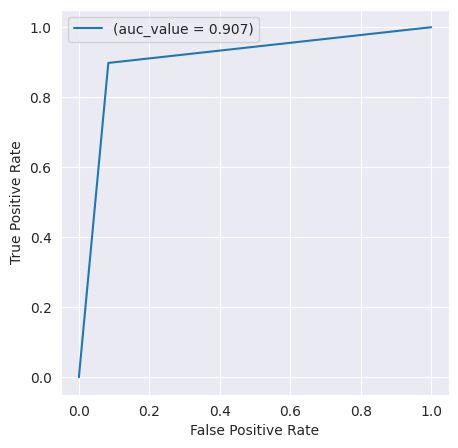


Confusion Matrix: 


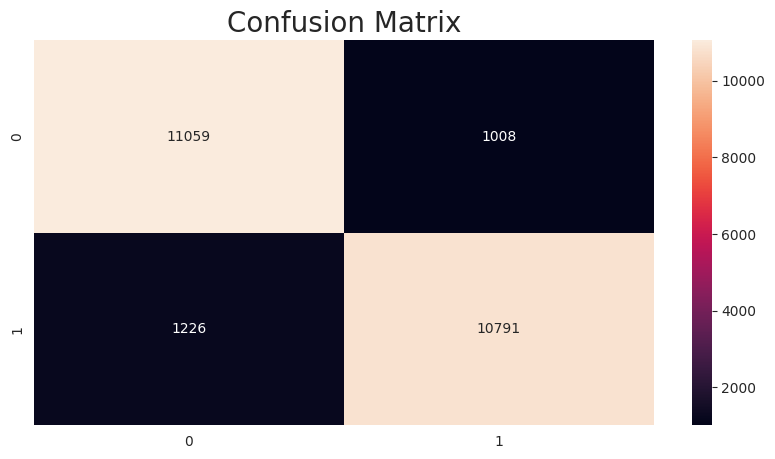

In [ ]:
nn = MLPClassifier()
result(x, y, 0.25, 42, nn)

## Algo 2 - Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.87      0.81     12067
           1       0.85      0.73      0.78     12017

    accuracy                           0.80     24084
   macro avg       0.80      0.80      0.80     24084
weighted avg       0.80      0.80      0.80     24084

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.798538448762664
----------------------------------------------------------------------------------------------------

F1 Score:  0.7833541703875692
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.7833541703875692
----------------------------------------------------------------------------------------------------



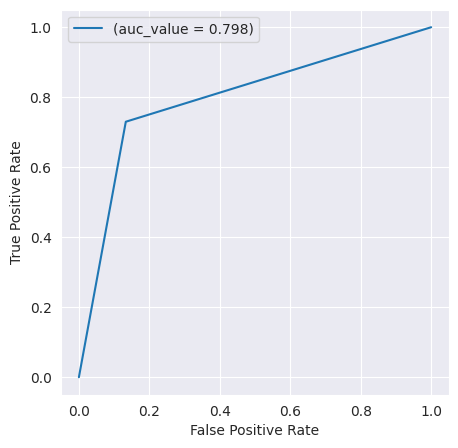


Confusion Matrix: 


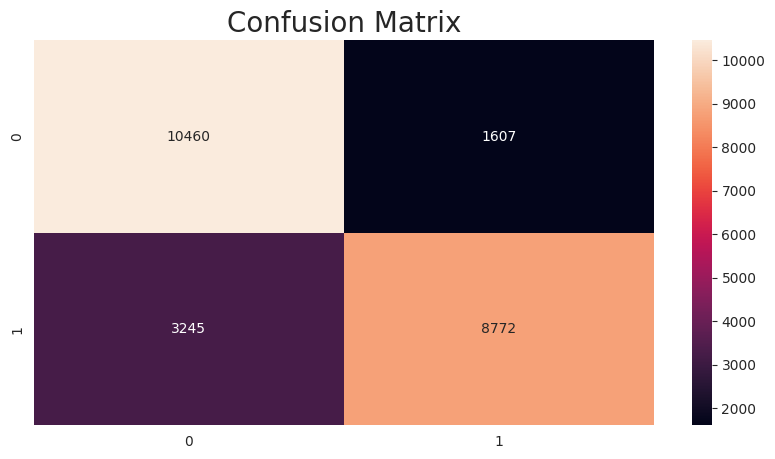

In [ ]:
lg = LogisticRegression()
result(x, y, 0.25, 42, lg)

## Algo 3 - KNN

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97     12067
           1       0.95      0.99      0.97     12017

    accuracy                           0.97     24084
   macro avg       0.97      0.97      0.97     24084
weighted avg       0.97      0.97      0.97     24084

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.972263743564192
----------------------------------------------------------------------------------------------------

F1 Score:  0.9728167982420445
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.9728167982420445
----------------------------------------------------------------------------------------------------



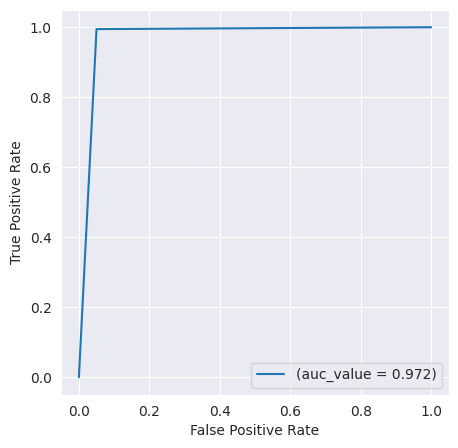


Confusion Matrix: 


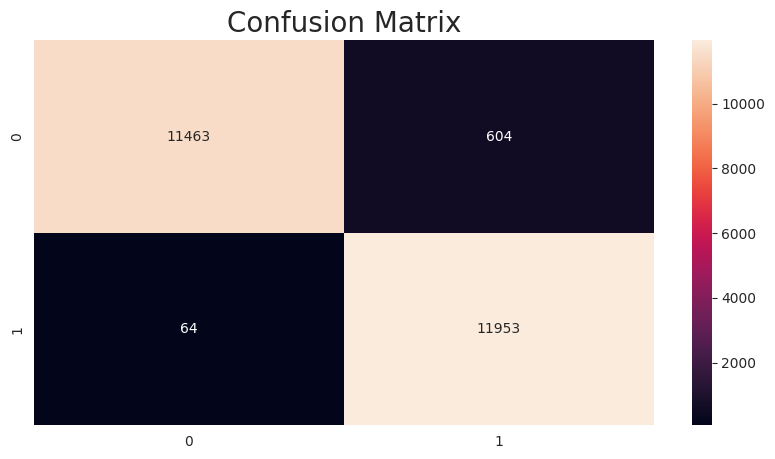

In [ ]:
knn=KNeighborsClassifier()
result(x, y, 0.25, 42, knn)

## Algo 4 - Random Forest

<ipython-input-147-ec476f2bae58>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     12067
           1       0.98      1.00      0.99     12017

    accuracy                           0.99     24084
   macro avg       0.99      0.99      0.99     24084
weighted avg       0.99      0.99      0.99     24084

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9906992193987709
----------------------------------------------------------------------------------------------------

F1 Score:  0.9907659328881193
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.9907659328881193
----------------------------------------------------------------------------------------------------



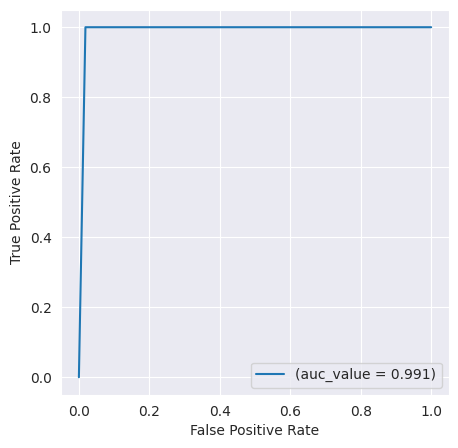


Confusion Matrix: 


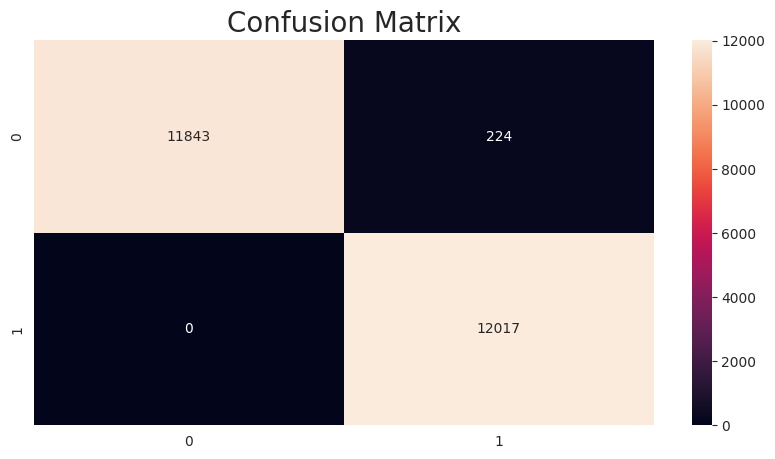

In [ ]:
Rf = RandomForestClassifier()
result(x, y, 0.25, 42, Rf)

## Algo 5 - Gradient Boosting

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92     12067
           1       0.96      0.87      0.91     12017

    accuracy                           0.91     24084
   macro avg       0.92      0.91      0.91     24084
weighted avg       0.92      0.91      0.91     24084

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9134695233349942
----------------------------------------------------------------------------------------------------

F1 Score:  0.9089956331877729
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.9089956331877729
----------------------------------------------------------------------------------------------------



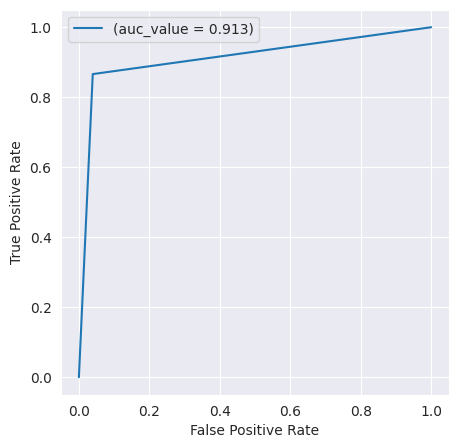


Confusion Matrix: 


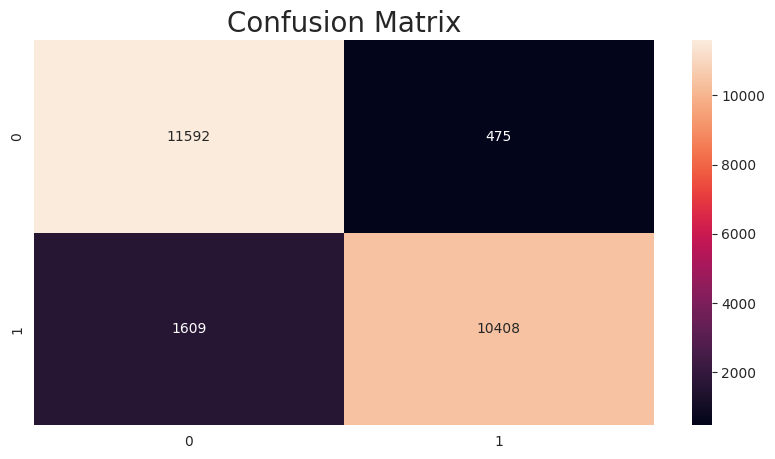

In [ ]:
gb=GradientBoostingClassifier()
result(x, y, 0.25, 42, gb)

## Algo 6 - Support Vector Machine (SVC)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88     12067
           1       0.89      0.86      0.88     12017

    accuracy                           0.88     24084
   macro avg       0.88      0.88      0.88     24084
weighted avg       0.88      0.88      0.88     24084

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.8774705198472015
----------------------------------------------------------------------------------------------------

F1 Score:  0.8754799780581459
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.8754799780581459
----------------------------------------------------------------------------------------------------



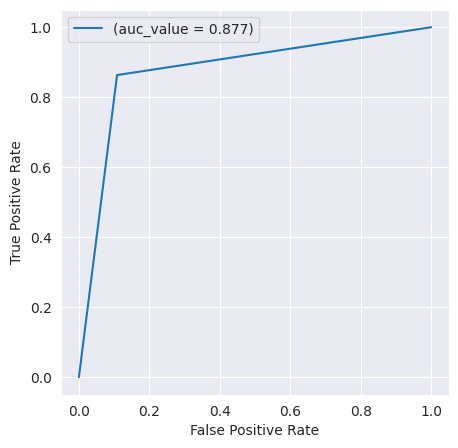


Confusion Matrix: 


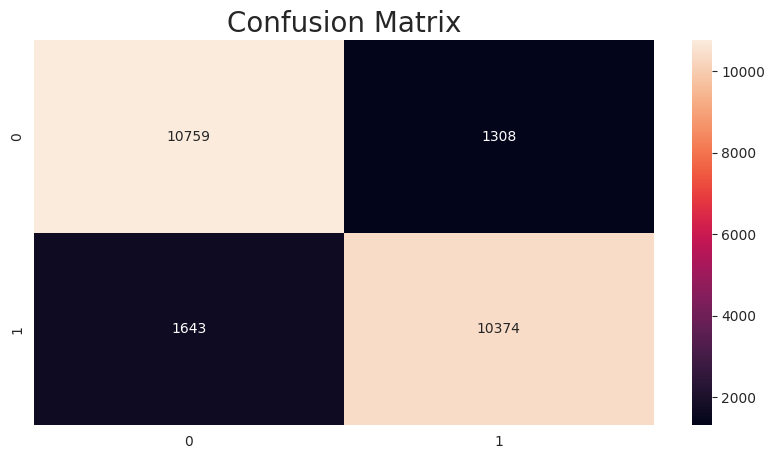

In [ ]:
sv=SVC()
result(x, y, 0.25, 42, sv)

## Algo 7 - Gaussian Naive Bayes

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.91      0.73     12067
           1       0.82      0.42      0.55     12017

    accuracy                           0.66     24084
   macro avg       0.71      0.66      0.64     24084
weighted avg       0.71      0.66      0.64     24084

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.6623069257598405
----------------------------------------------------------------------------------------------------

F1 Score:  0.551480725748635
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.551480725748635
----------------------------------------------------------------------------------------------------



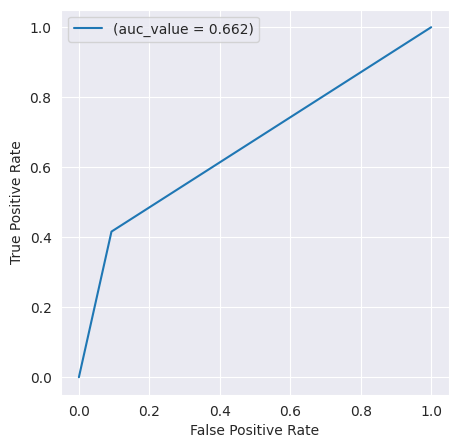


Confusion Matrix: 


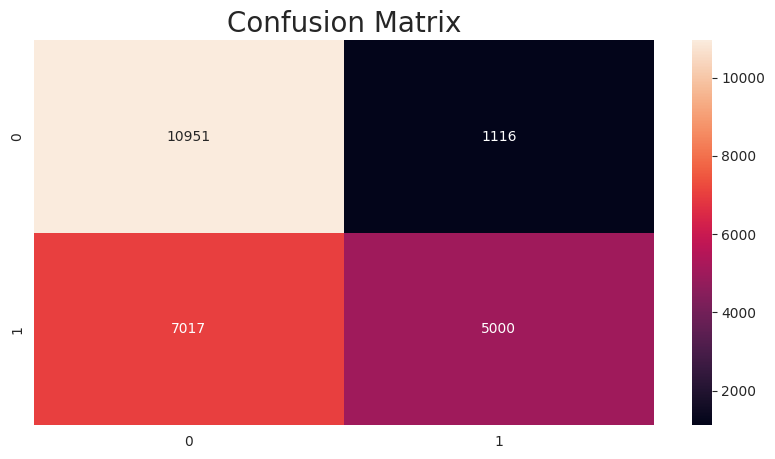

In [ ]:
gn=GaussianNB()
result(x, y, 0.25, 42, gn)

## Algo 8 - Decision Tree


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     12067
           1       0.98      1.00      0.99     12017

    accuracy                           0.99     24084
   macro avg       0.99      0.99      0.99     24084
weighted avg       0.99      0.99      0.99     24084

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9896196645075569
----------------------------------------------------------------------------------------------------

F1 Score:  0.9897051556580465
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.9897051556580465
----------------------------------------------------------------------------------------------------



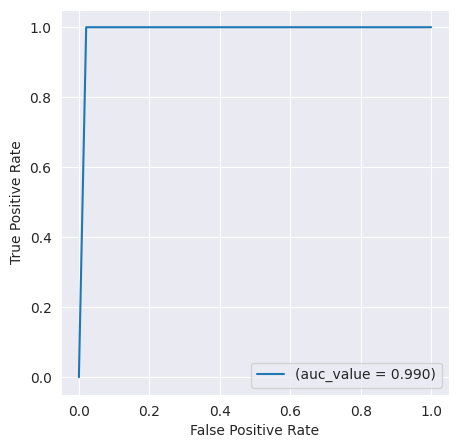


Confusion Matrix: 


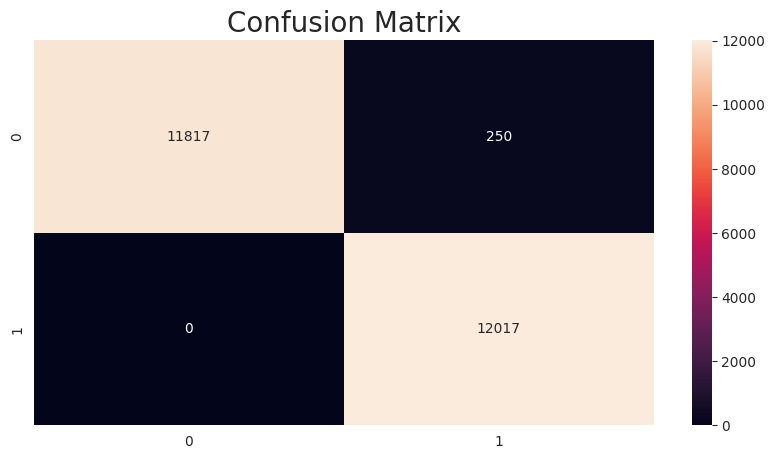

In [ ]:
dt=DecisionTreeClassifier()
result(x, y, 0.25, 42, dt)

## Algo 9 - Stochastic Gradient Descent (SGD)  


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.89      0.81     12067
           1       0.86      0.69      0.76     12017

    accuracy                           0.79     24084
   macro avg       0.80      0.79      0.79     24084
weighted avg       0.80      0.79      0.79     24084

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.7877013785085534
----------------------------------------------------------------------------------------------------

F1 Score:  0.7639972305561966
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.7639972305561966
----------------------------------------------------------------------------------------------------



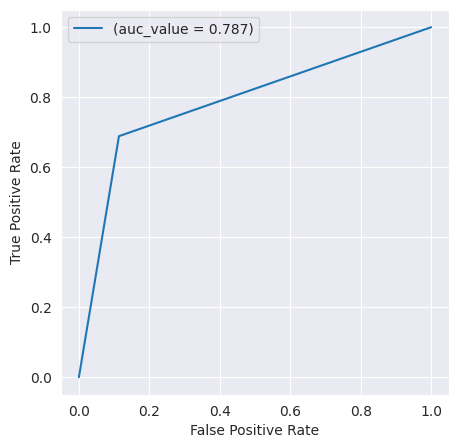


Confusion Matrix: 


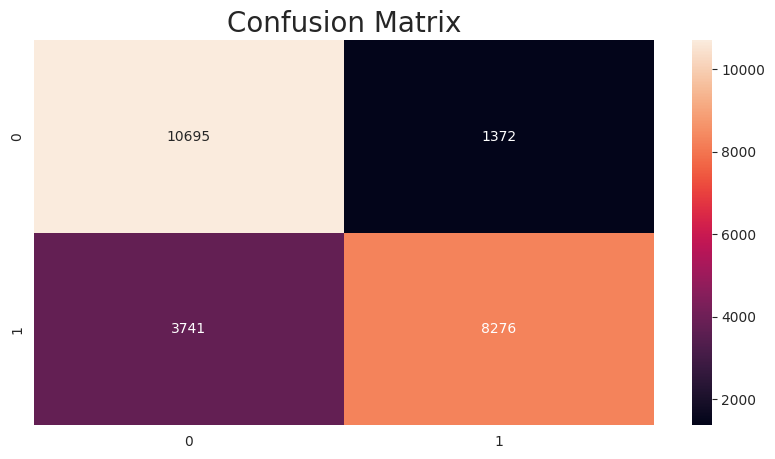

In [ ]:
sg=SGDClassifier()
result(x, y, 0.25, 42, sg)

# Create comparison list for all algo
                      


In [ ]:
classifier_list = ["Neural Network", "Logistic Regression", "KNN", "Random Forest","Gradient Boosting", "Support Vector Machine", "Naive Bayes", "Decision Tree", "Stochastic Gradient Descent"]

list_class = []

for i in range(0, len(classifier_list)):
  listclass = [classifier_list[i], Accuracy_list[i], F1_list[i], roc_auc_list[i]]
  list_class.append(listclass)

list_class

[['Neural Network',
  0.9072413220395283,
  0.9061975142761169,
  0.9072221303237998],
 ['Logistic Regression',
  0.798538448762664,
  0.7833541703875692,
  0.7983963824514535],
 ['KNN', 0.972263743564192, 0.9728167982420445, 0.9723101728091772],
 ['Random Forest', 0.9906992193987709, 0.9907659328881193, 0.9907184884395458],
 ['Gradient Boosting',
  0.9134695233349942,
  0.9089956331877729,
  0.9133713979227198],
 ['Support Vector Machine',
  0.8774705198472015,
  0.8754799780581459,
  0.8774411142459098],
 ['Naive Bayes', 0.6623069257598405, 0.551480725748635, 0.6617967954419756],
 ['Decision Tree', 0.9896196645075569, 0.9897051556580465, 0.9896411701334218],
 ['Stochastic Gradient Descent',
  0.7877013785085534,
  0.7639972305561966,
  0.7874962522189722]]

In [ ]:
classCompare_table = pd.DataFrame(list_class, columns = ["Classifier", "Accuracy", "F1 Score", "ROC-AUC Score"])
classCompare_table.sort_values(ascending = False, by = "Accuracy")

,Classifier,Accuracy,F1 Score,ROC-AUC Score
3,Random Forest,0.990699,0.990766,0.990718
7,Decision Tree,0.989620,0.989705,0.989641
2,KNN,0.972264,0.972817,0.972310
4,Gradient Boosting,0.913470,0.908996,0.913371
0,Neural Network,0.907241,0.906198,0.907222
5,Support Vector Machine,0.877471,0.875480,0.877441
1,Logistic Regression,0.798538,0.783354,0.798396
8,Stochastic Gradient Descent,0.787701,0.763997,0.787496
6,Naive Bayes,0.662307,0.551481,0.661797


# Comparison of accuracy


<Axes: xlabel='Accuracy', ylabel='Classifier'>

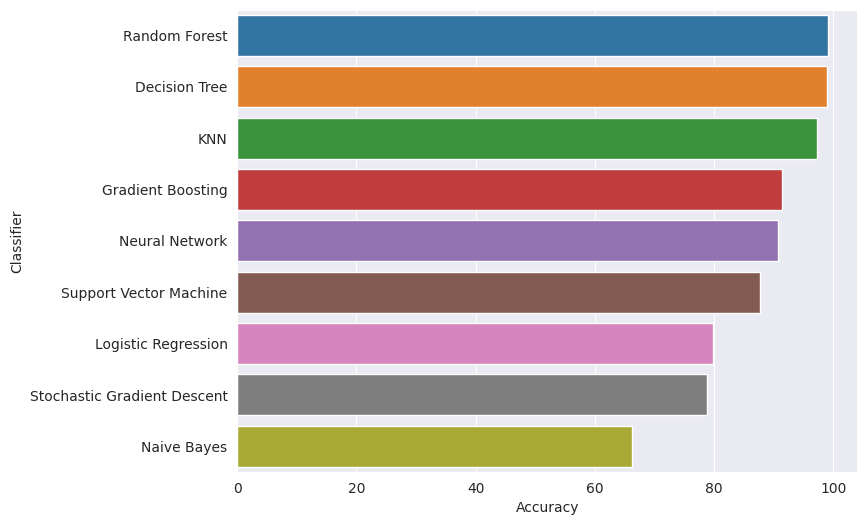

In [ ]:
plt.figure(figsize = (8,6))
sns.barplot(x = classCompare_table["Accuracy"]*100,
            y = classCompare_table["Classifier"],
            data = classCompare_table,
            order = classCompare_table.sort_values("Accuracy", ascending = False).Classifier)

# Comparison of F1 Score


<Axes: xlabel='F1 Score', ylabel='Classifier'>

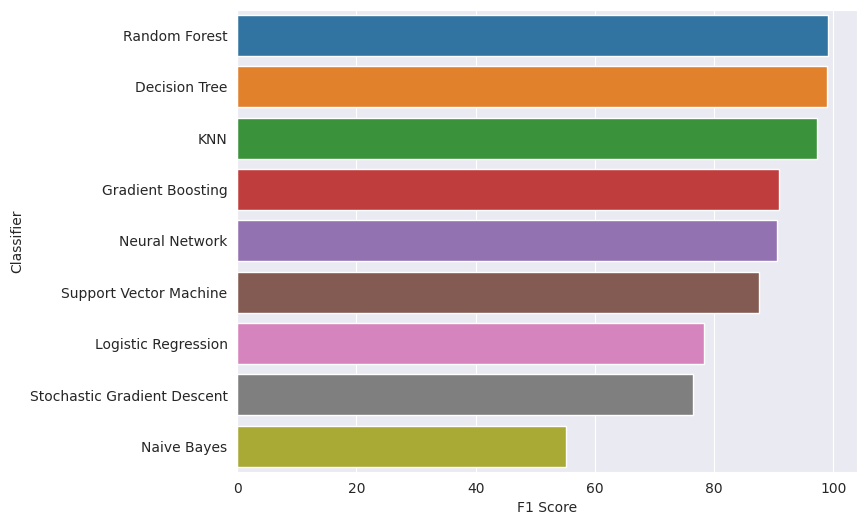

In [ ]:
plt.figure(figsize = (8,6))
sns.barplot(x = classCompare_table["F1 Score"]*100,
            y = classCompare_table["Classifier"],
            data = classCompare_table,
            order = classCompare_table.sort_values("F1 Score", ascending = False).Classifier)

# Comparison of ROC Score


<Axes: xlabel='ROC-AUC Score', ylabel='Classifier'>

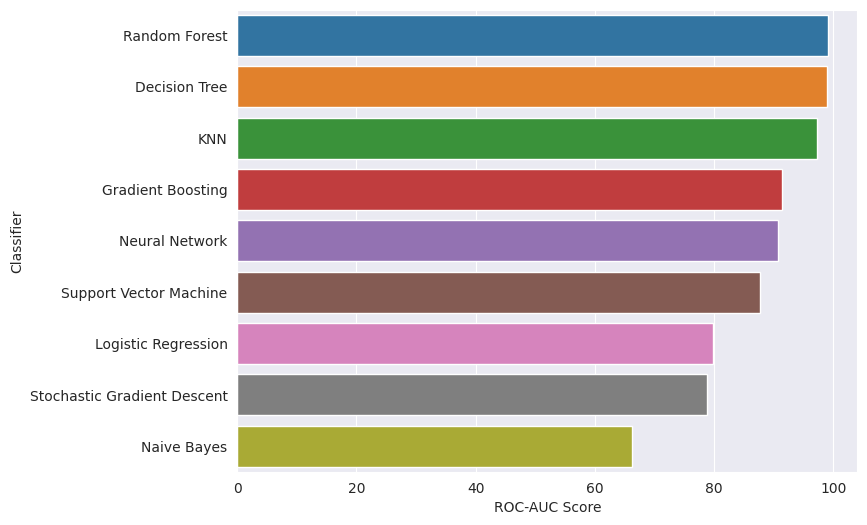

In [ ]:
plt.figure(figsize = (8,6))
sns.barplot(x = classCompare_table["ROC-AUC Score"]*100,
            y = classCompare_table["Classifier"],
            data = classCompare_table,
            order = classCompare_table.sort_values("ROC-AUC Score", ascending = False).Classifier)

# Conclusion

The Random Forest Classifier is the best machine learning model for predicting employee attrition due to its accuracy, resilience, and feature-important insights, while Decision Tree is a reliable substitute.